In [1]:
import numpy as np
import sympy
import hls4ml

/afs/cern.ch/work/h/htsoi/miniconda3/envs/sr/lib/python3.9/site-packages/hls4ml/converters/__init__.py:16: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


# Pass trained expressions to hls4ml converter and compile

In [2]:
expr_str = ['0.0182244924528517*x0*x15**2 - 0.00911224622642586*x0*x15*x2 - 0.0734913430658735*x0*x15 + 0.0378622715148065*x0*x2 - 0.00927916358633451*x0 + 0.122152869520453*x14 - 0.0182244924528517*x15**3 + 0.0820102160378328*x15**2*x2 + 0.0734913430658735*x15**2 - 0.0364489849057034*x15*x2**2 - 0.3318276437783*x15*x2 + 0.507706103586335*x15 + 0.151449086059226*x2**2 - 0.535543594345338*x2 - 0.664941511800588',
            '-0.00782290964409003*x0*x15 + 0.0275202477493014*x0 + 0.0262304099426025*x14**2*x15**2 - 0.0262304099426025*x14**2*x15*x4 - 0.144439852204492*x14**2*x15 + 0.0922760728460551*x14**2*x4 + 0.183507185535319*x14**2 - 0.053704008852914*x14*x15**2 + 0.053704008852914*x14*x15*x4 + 0.295725423982222*x14*x15 - 0.188925565550845*x14*x4 - 0.375711684953725*x14 - 0.786792318390925',
            '0.068206028*x14*x3*x4 - x14 - 0.102309042*x15*x3 + 0.0951416542833913*x2*x3 - 0.36356023*x3**2 - 0.034103014*x3*x4 + 1.8392099*x3 - 0.29026183',
            '-0.0524362323283681*x0*x14**2 + 0.0291586352006943*x0*x14 + 0.0524362323283681*x14**2*x2 - 0.266353394399205*x14**2 + 0.0524362323283681*x14*x15 - 0.0815948675290624*x14*x2 + 0.0524362323283681*x14*x3 + 0.104872464656736*x14*x4 + 0.175327896051117*x14 - 0.258148225200694*x15 + 0.0291586352006943*x2 - 0.258148225200694*x3 - 0.0583172704013885*x4 - 0.448575396678114',
            '0.00775102254893918*x14*x15*x3 - 0.0494407839043327*x14*x15 - 0.0416897613553935*x14*x3 + 0.230779132558311*x14 - 0.00775102254893918*x15*x3**3 + 0.0494407839043327*x15*x3**2 + 0.00515794585887275*x15*x3 - 0.21882203763596*x15 + 0.0416897613553935*x3**3 - 0.230779132558311*x3**2 - 0.0277426017770875*x3 - 0.399260694990375']
expr = []
for i in range(5):
    expr.append(sympy.parsing.sympy_parser.parse_expr(expr_str[i]))

In [3]:
hls_model = hls4ml.converters.convert_from_symbolic_expression(expr,
                                                               n_symbols=16,
                                                               output_dir='my-hls-test',
                                                               precision='ap_fixed<8,4>')

hls_model.write()
hls_model.compile()

Writing HLS project
Done
Writing HLS project
Done


In [ ]:
hls_model.predict(np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], dtype=np.float32))

In [4]:
!cat my-hls-test/firmware/myproject.cpp 

//
//    rfnoc-hls-neuralnet: Vivado HLS code for neural-net building blocks
//
//    Copyright (C) 2017 EJ Kreinar
//
//    This program is free software: you can redistribute it and/or modify
//    it under the terms of the GNU General Public License as published by
//    the Free Software Foundation, either version 3 of the License, or
//    (at your option) any later version.
//
//    This program is distributed in the hope that it will be useful,
//    but WITHOUT ANY WARRANTY; without even the implied warranty of
//    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
//    GNU General Public License for more details.
//
//    You should have received a copy of the GNU General Public License
//    along with this program.  If not, see <http://www.gnu.org/licenses/>.
//
#include <iostream>

#include "myproject.h"
#include "parameters.h"

void myproject(
    input_t x[N_INPUT_1_1],
    result_t y[N_OUTPUTS_2]
) {

    //hls-fpga-machine-learning insert IO
    #pragma HL

# Compare PySR and hls4ml accuracy

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, accuracy_score

In [6]:
from sklearn.datasets import fetch_openml
data = fetch_openml('hls4ml_lhc_jets_hlf')
X, Y = data['data'].to_numpy(), data['target'].to_numpy()

print(data['feature_names'])
print(X.shape, Y.shape)
print(Y[:12])

LE = LabelEncoder()
Y = LE.fit_transform(Y)
print(Y[:12])

Y = to_categorical(Y, 5)
print(Y[:12])

Y=2*Y-1
print(Y[:12])

['zlogz', 'c1_b0_mmdt', 'c1_b1_mmdt', 'c1_b2_mmdt', 'c2_b1_mmdt', 'c2_b2_mmdt', 'd2_b1_mmdt', 'd2_b2_mmdt', 'd2_a1_b1_mmdt', 'd2_a1_b2_mmdt', 'm2_b1_mmdt', 'm2_b2_mmdt', 'n2_b1_mmdt', 'n2_b2_mmdt', 'mass_mmdt', 'multiplicity']
(830000, 16) (830000,)
['g' 'w' 't' 'z' 'w' 'w' 't' 'g' 'z' 'g' 't' 'q']
[0 3 2 4 3 3 2 0 4 0 2 1]
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]
[[ 1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1. -1. -1.  1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1.  1. -1. -1.]
 [ 1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1.]
 [ 1. -1. -1. -1. -1.]
 [-1. -1.  1. -1. -1.]
 [-1.  1. -1. -1. -1.]]


In [7]:
train_ratio = 0.01
val_ratio = 0.5
test_ratio = 1 - train_ratio - val_ratio

#flavor_sig = 3
#print('flavor_sig = {}'.format(flavor_sig))

# randomly partition data set into train/val/test sets with given ratios
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size = test_ratio, random_state=15)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = val_ratio/(val_ratio+train_ratio), random_state=15)

# standardize feature variables
scaler = StandardScaler().fit(X_train_val)
del X_train_val
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# print input data shapes
print("\nPartition the data set into train/val/test: %.2f/%.2f/%.2f" % (train_ratio, val_ratio, test_ratio))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_val.shape: " + str(X_val.shape))
print("Y_val.shape: " + str(Y_val.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))


Partition the data set into train/val/test: 0.01/0.50/0.49
X_train.shape: (8300, 16)
Y_train.shape: (8300, 5)
X_val.shape: (415000, 16)
Y_val.shape: (415000, 5)
X_test.shape: (406700, 16)
Y_test.shape: (406700, 5)


In [8]:
Y_hls4ml=hls_model.predict(X_test)

In [9]:
print("Accuracy: {}".format(accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_hls4ml, axis=1))))

Accuracy: 0.6578509958200147


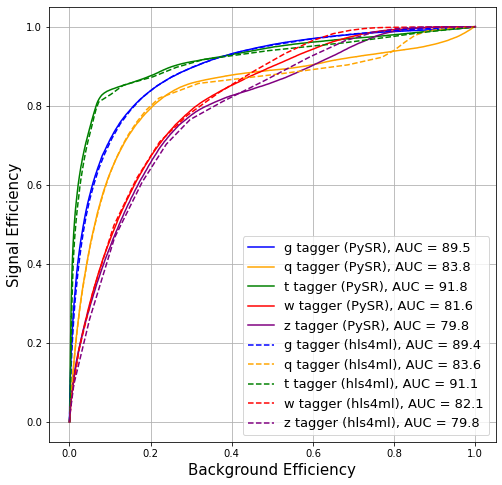

In [16]:
def plot_roc(y_test, y_pred, labels, dashed):
    color = ['blue','orange','green','red','purple']
    for x, label in enumerate(labels):        
        fpr, tpr, _ = roc_curve(y_test[:, x], y_pred[:, x])
        if dashed == 0:
            plt.plot(fpr, tpr, label='{0} tagger (PySR), AUC = {1:.1f}'.format(label, auc(fpr, tpr)*100.), linestyle='-', color=color[x], lw=1.5)
        if dashed == 1:
            plt.plot(fpr, tpr, label='{0} tagger (hls4ml), AUC = {1:.1f}'.format(label, auc(fpr, tpr)*100.), linestyle='--', color=color[x], lw=1.5)
    #plt.semilogy()
    plt.ylabel("Signal Efficiency", size=15)
    plt.xlabel("Background Efficiency", size=15)
    #plt.ylim(0.001, 1)
    plt.grid(True)
    plt.legend(loc='best', prop={'size': 13})  
    
plt.figure(figsize=(8, 8))
plot_roc(Y_test, Y_pysr, LE.classes_, 0)
plot_roc(Y_test, Y_hls4ml, LE.classes_, 1)

# Run synthesis from command line

In [ ]:
source /data/tools/Xilinx/Vivado/2020.1/settings64.sh
source /data/setup_xilinx_lic.sh

In [ ]:
!vivado_hls -f build_prj.tcl "reset=1 synth=1 csim=0 cosim=0 validation=0 export=0 vsynth=0"

In [ ]:
#hls4ml.report.read_vivado_report('my-hls-test/')
!cat my-hls-test/myproject_prj/solution1/syn/report/myproject_csynth.rpt

# Appendix: PySR training

In [10]:
from pysr import PySRRegressor
model_pysr = PySRRegressor.from_file("hall_of_fame_2022-11-06_200516.794.pkl")

Checking if hall_of_fame_2022-11-06_200516.794.pkl exists...
Loading model from hall_of_fame_2022-11-06_200516.794.pkl


In [ ]:
from pysr import PySRRegressor

model_pysr = PySRRegressor(
    model_selection="accuracy",
    niterations=40,
    timeout_in_seconds=60*60*1,
    maxsize=40,
    select_k_features=6,
    binary_operators=["+", "-", "*"],
    #unary_operators=[
        #"sin",
        #"cos",
        #"exp",
        #"square",
        #"cube"
    #],
    warm_start=True,
    #loss="loss(x, y) = (x - y)^2"
    loss="L2MarginLoss()" # (1 - y * y')^2
    #loss="loss(x, y) = (1 - x * y)^4"
    #loss="ExpLoss()" # exp(- y * y')
)

In [ ]:
model_pysr.fit(X_train, Y_train)

In [ ]:
print(model_pysr)

In [11]:
print("Original PySR equations\n")
with sympy.evaluate(False):
    for i in range(5):
        print("Tagger {} = ".format(i)+str(model_pysr.sympy()[i])+"\n------------------------------------------")

Original PySR equations

Tagger 0 = -0.24507678*x14 - x15 + x2 - (-1.0540535)*0.01734448*(x15 - 4.1550975)*(x2 + x2 - (-x0 + x15 - (x2 + x2)))*(-x15 - x15 + x2 - 1*0.24507678) + 1.3340802*(-0.49842694)
------------------------------------------
Tagger 1 = 5.0934877 - (-0.3653497*x0 + (-x15 + x4 + 1.2250266*1.6233735)*(-x14 + 0.48218015 + 1.5652148)*1.2250266*x14)*(x15*0.13861643 - 0.48763934)*(-0.15447025)
------------------------------------------
Tagger 2 = x3*(-0.074088484*x2 + x3*(-0.36356023) + (x14*x4 + x14*x4 - x15 - x15 - x15 + x2 + x2 - x4)*0.034103014 + 1.8392099) - (x14 + 0.29026183)
------------------------------------------
Tagger 3 = (x15 + x3 + (x14 - 0.556078)*(x14 + (x14*(x2 - (x0 - 1*(-0.712557))) + x15 - x2 + x3 + x4 + x4 - 1*(-0.22898959) - 1*(-0.29001477))*(-0.22898959)) + 0.3149131 - 1*(-1.5779325))*(-0.22898959)
------------------------------------------
Tagger 4 = -(x15 - 1*0.18592149) + (x15 + x3 - ((x15*x3 - x15)*0.18592149 - 1*0.34415802) - 0.7901891 - 0.4764

In [12]:
print("Sympy simplified equations\n")
for i in range(5):
    print("Tagger {} = ".format(i)+str(model_pysr.sympy()[i])+"\n------------------------------------------")

Sympy simplified equations

Tagger 0 = 0.122152869520453*x14 + 0.49842694*x15 - 0.49842694*x2 + 0.49842694*(x15 - 4.1550975)*(-1.0540535*x0 + 1.0540535*x15 - 4.216214*x2)*(-0.03468896*x15 + 0.01734448*x2 - 0.0042507293091744) - 0.664941511800588
------------------------------------------
Tagger 1 = 0.15447025*(-0.3653497*x0 + x14*(2.50811327445567 - 1.2250266*x14)*(-x15 + x4 + 1.9886757192351))*(0.13861643*x15 - 0.48763934) - 0.786792318390925
------------------------------------------
Tagger 2 = -x14 + x3*(0.068206028*x14*x4 - 0.102309042*x15 + 0.0951416542833913*x2 - 0.36356023*x3 - 0.034103014*x4 + 1.8392099) - 0.29026183
------------------------------------------
Tagger 3 = -0.22898959*x15 - 0.22898959*x3 - 0.22898959*(x14 - 0.556078)*(-0.22898959*x14*(-x0 + x2 - 0.712557) + x14 - 0.22898959*x15 + 0.22898959*x2 - 0.22898959*x3 - 0.45797918*x4 - 0.118846595604612) - 0.433441937877304
------------------------------------------
Tagger 4 = -0.18592149*x15 + 0.18592149*(x14 - x3**2 + 0.

In [13]:
print("Sympy expanded equations\n")
x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15 = sympy.symbols('x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15')
for i in range(5):
    print("Tagger {} = ".format(i)+str(sympy.expand(model_pysr.sympy()[i]))+"\n------------------------------------------")

Sympy expanded equations

Tagger 0 = 0.0182244924528517*x0*x15**2 - 0.00911224622642586*x0*x15*x2 - 0.0734913430658735*x0*x15 + 0.0378622715148065*x0*x2 - 0.00927916358633451*x0 + 0.122152869520453*x14 - 0.0182244924528517*x15**3 + 0.0820102160378328*x15**2*x2 + 0.0734913430658735*x15**2 - 0.0364489849057034*x15*x2**2 - 0.3318276437783*x15*x2 + 0.507706103586335*x15 + 0.151449086059226*x2**2 - 0.535543594345338*x2 - 0.664941511800588
------------------------------------------
Tagger 1 = -0.00782290964409003*x0*x15 + 0.0275202477493014*x0 + 0.0262304099426025*x14**2*x15**2 - 0.0262304099426025*x14**2*x15*x4 - 0.144439852204492*x14**2*x15 + 0.0922760728460551*x14**2*x4 + 0.183507185535319*x14**2 - 0.053704008852914*x14*x15**2 + 0.053704008852914*x14*x15*x4 + 0.295725423982222*x14*x15 - 0.188925565550845*x14*x4 - 0.375711684953725*x14 - 0.786792318390925
------------------------------------------
Tagger 2 = 0.068206028*x14*x3*x4 - x14 - 0.102309042*x15*x3 + 0.0951416542833913*x2*x3 - 0.36

In [14]:
Y_pysr=model_pysr.predict(X_test)

In [15]:
print("Accuracy: {}".format(accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_pysr, axis=1))))

Accuracy: 0.6934275879026309


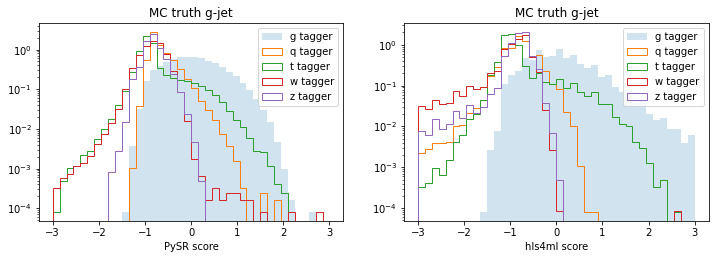

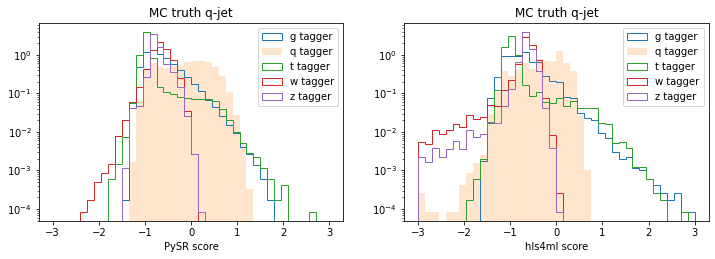

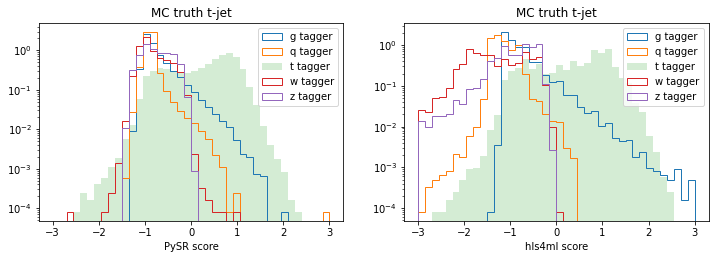

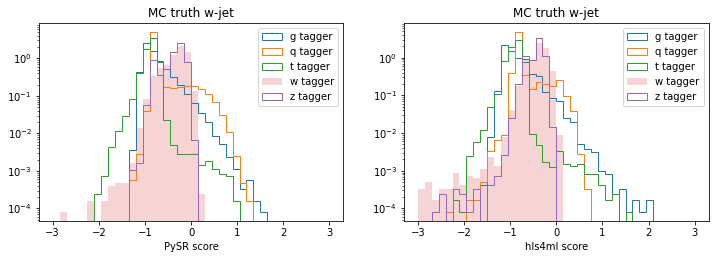

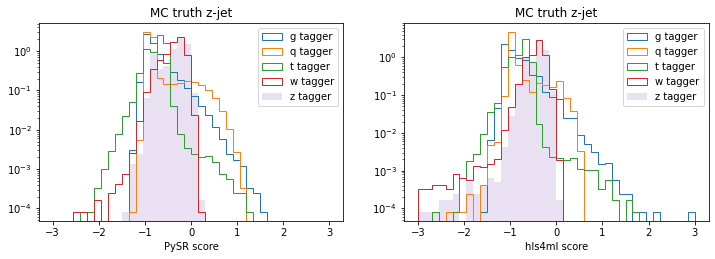

In [17]:
nbins=40
rmin=-3
rmax=3

fig, ax = plt.subplots(figsize = (12,8))
ax = plt.subplot(2, 2, 1)
plt.hist(Y_pysr[Y_test[:,0]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='g tagger', log=True)
plt.hist(Y_pysr[Y_test[:,0]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='q tagger')
plt.hist(Y_pysr[Y_test[:,0]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='t tagger')
plt.hist(Y_pysr[Y_test[:,0]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='w tagger')
plt.hist(Y_pysr[Y_test[:,0]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='z tagger')
plt.legend(loc='best')
plt.title('MC truth g-jet')
plt.xlabel('PySR score')
ax = plt.subplot(2, 2, 2)
plt.hist(Y_hls4ml[Y_test[:,0]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='g tagger', log=True)
plt.hist(Y_hls4ml[Y_test[:,0]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='q tagger')
plt.hist(Y_hls4ml[Y_test[:,0]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='t tagger')
plt.hist(Y_hls4ml[Y_test[:,0]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='w tagger')
plt.hist(Y_hls4ml[Y_test[:,0]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='z tagger')
plt.legend(loc='best')
plt.title('MC truth g-jet')
plt.xlabel('hls4ml score')
plt.show()

fig, ax = plt.subplots(figsize = (12,8))
ax = plt.subplot(2, 2, 1)
plt.hist(Y_pysr[Y_test[:,1]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='g tagger', log=True)
plt.hist(Y_pysr[Y_test[:,1]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='q tagger')
plt.hist(Y_pysr[Y_test[:,1]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='t tagger')
plt.hist(Y_pysr[Y_test[:,1]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='w tagger')
plt.hist(Y_pysr[Y_test[:,1]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='z tagger')
plt.legend(loc='best')
plt.title('MC truth q-jet')
plt.xlabel('PySR score')
ax = plt.subplot(2, 2, 2)
plt.hist(Y_hls4ml[Y_test[:,1]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='g tagger', log=True)
plt.hist(Y_hls4ml[Y_test[:,1]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='q tagger')
plt.hist(Y_hls4ml[Y_test[:,1]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='t tagger')
plt.hist(Y_hls4ml[Y_test[:,1]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='w tagger')
plt.hist(Y_hls4ml[Y_test[:,1]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='z tagger')
plt.legend(loc='best')
plt.title('MC truth q-jet')
plt.xlabel('hls4ml score')
plt.show()

fig, ax = plt.subplots(figsize = (12,8))
ax = plt.subplot(2, 2, 1)
plt.hist(Y_pysr[Y_test[:,2]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='g tagger', log=True)
plt.hist(Y_pysr[Y_test[:,2]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='q tagger')
plt.hist(Y_pysr[Y_test[:,2]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='t tagger')
plt.hist(Y_pysr[Y_test[:,2]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='w tagger')
plt.hist(Y_pysr[Y_test[:,2]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='z tagger')
plt.legend(loc='best')
plt.title('MC truth t-jet')
plt.xlabel('PySR score')
ax = plt.subplot(2, 2, 2)
plt.hist(Y_hls4ml[Y_test[:,2]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='g tagger', log=True)
plt.hist(Y_hls4ml[Y_test[:,2]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='q tagger')
plt.hist(Y_hls4ml[Y_test[:,2]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='t tagger')
plt.hist(Y_hls4ml[Y_test[:,2]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='w tagger')
plt.hist(Y_hls4ml[Y_test[:,2]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='z tagger')
plt.legend(loc='best')
plt.title('MC truth t-jet')
plt.xlabel('hls4ml score')
plt.show()

fig, ax = plt.subplots(figsize = (12,8))
ax = plt.subplot(2, 2, 1)
plt.hist(Y_pysr[Y_test[:,3]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='g tagger', log=True)
plt.hist(Y_pysr[Y_test[:,3]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='q tagger')
plt.hist(Y_pysr[Y_test[:,3]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='t tagger')
plt.hist(Y_pysr[Y_test[:,3]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='w tagger')
plt.hist(Y_pysr[Y_test[:,3]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='z tagger')
plt.legend(loc='best')
plt.title('MC truth w-jet')
plt.xlabel('PySR score')
ax = plt.subplot(2, 2, 2)
plt.hist(Y_hls4ml[Y_test[:,3]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='g tagger', log=True)
plt.hist(Y_hls4ml[Y_test[:,3]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='q tagger')
plt.hist(Y_hls4ml[Y_test[:,3]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='t tagger')
plt.hist(Y_hls4ml[Y_test[:,3]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='w tagger')
plt.hist(Y_hls4ml[Y_test[:,3]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='z tagger')
plt.legend(loc='best')
plt.title('MC truth w-jet')
plt.xlabel('hls4ml score')
plt.show()

fig, ax = plt.subplots(figsize = (12,8))
ax = plt.subplot(2, 2, 1)
plt.hist(Y_pysr[Y_test[:,4]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='g tagger', log=True)
plt.hist(Y_pysr[Y_test[:,4]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='q tagger')
plt.hist(Y_pysr[Y_test[:,4]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='t tagger')
plt.hist(Y_pysr[Y_test[:,4]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='w tagger')
plt.hist(Y_pysr[Y_test[:,4]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='z tagger')
plt.legend(loc='best')
plt.title('MC truth z-jet')
plt.xlabel('PySR score')
ax = plt.subplot(2, 2, 2)
plt.hist(Y_hls4ml[Y_test[:,4]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='g tagger', log=True)
plt.hist(Y_hls4ml[Y_test[:,4]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='q tagger')
plt.hist(Y_hls4ml[Y_test[:,4]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='t tagger')
plt.hist(Y_hls4ml[Y_test[:,4]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='w tagger')
plt.hist(Y_hls4ml[Y_test[:,4]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='z tagger')
plt.legend(loc='best')
plt.title('MC truth z-jet')
plt.xlabel('hls4ml score')
plt.show()

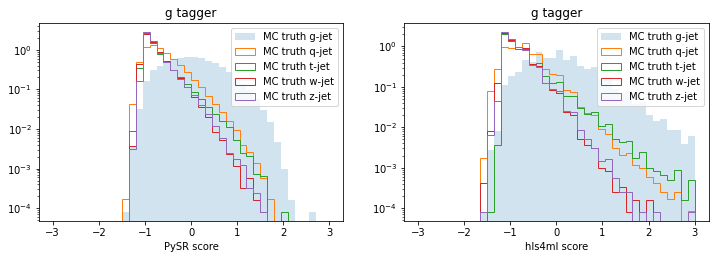

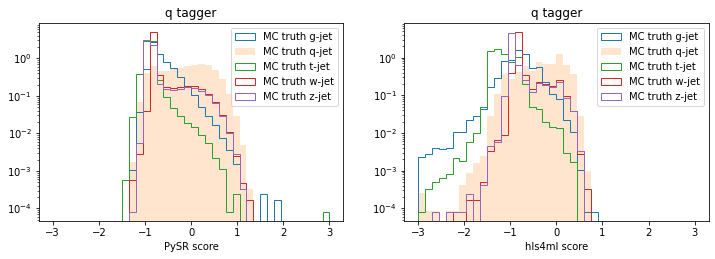

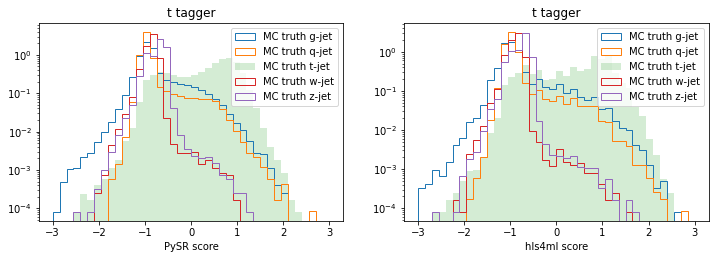

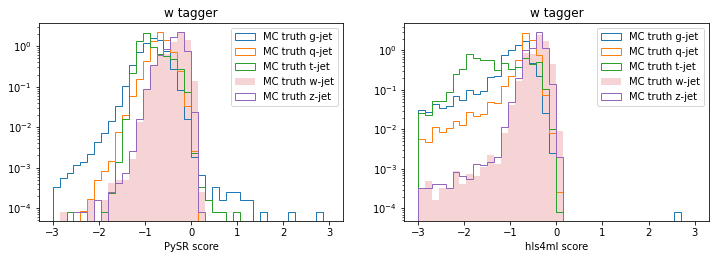

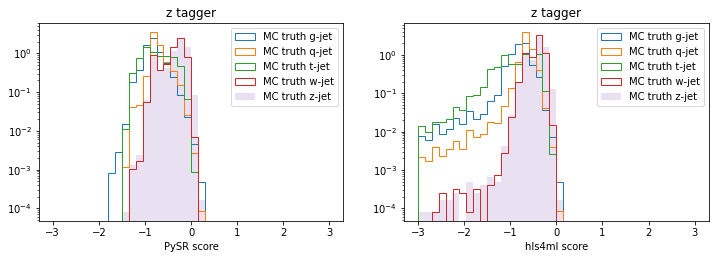

In [18]:
nbins=40
rmin=-3
rmax=3

fig, ax = plt.subplots(figsize = (12,8))
ax = plt.subplot(2, 2, 1)
plt.hist(Y_pysr[Y_test[:,0]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='MC truth g-jet', log=True)
plt.hist(Y_pysr[Y_test[:,1]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth q-jet')
plt.hist(Y_pysr[Y_test[:,2]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth t-jet')
plt.hist(Y_pysr[Y_test[:,3]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth w-jet')
plt.hist(Y_pysr[Y_test[:,4]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth z-jet')
plt.legend(loc='best')
plt.title('g tagger')
plt.xlabel('PySR score')
ax = plt.subplot(2, 2, 2)
plt.hist(Y_hls4ml[Y_test[:,0]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='MC truth g-jet', log=True)
plt.hist(Y_hls4ml[Y_test[:,1]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth q-jet')
plt.hist(Y_hls4ml[Y_test[:,2]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth t-jet')
plt.hist(Y_hls4ml[Y_test[:,3]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth w-jet')
plt.hist(Y_hls4ml[Y_test[:,4]==1,0], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth z-jet')
plt.legend(loc='best')
plt.title('g tagger')
plt.xlabel('hls4ml score')
plt.show()

fig, ax = plt.subplots(figsize = (12,8))
ax = plt.subplot(2, 2, 1)
plt.hist(Y_pysr[Y_test[:,0]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth g-jet', log=True)
plt.hist(Y_pysr[Y_test[:,1]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='MC truth q-jet')
plt.hist(Y_pysr[Y_test[:,2]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth t-jet')
plt.hist(Y_pysr[Y_test[:,3]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth w-jet')
plt.hist(Y_pysr[Y_test[:,4]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth z-jet')
plt.legend(loc='best')
plt.title('q tagger')
plt.xlabel('PySR score')
ax = plt.subplot(2, 2, 2)
plt.hist(Y_hls4ml[Y_test[:,0]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth g-jet', log=True)
plt.hist(Y_hls4ml[Y_test[:,1]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='MC truth q-jet')
plt.hist(Y_hls4ml[Y_test[:,2]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth t-jet')
plt.hist(Y_hls4ml[Y_test[:,3]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth w-jet')
plt.hist(Y_hls4ml[Y_test[:,4]==1,1], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth z-jet')
plt.legend(loc='best')
plt.title('q tagger')
plt.xlabel('hls4ml score')
plt.show()

fig, ax = plt.subplots(figsize = (12,8))
ax = plt.subplot(2, 2, 1)
plt.hist(Y_pysr[Y_test[:,0]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth g-jet', log=True)
plt.hist(Y_pysr[Y_test[:,1]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth q-jet')
plt.hist(Y_pysr[Y_test[:,2]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='MC truth t-jet')
plt.hist(Y_pysr[Y_test[:,3]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth w-jet')
plt.hist(Y_pysr[Y_test[:,4]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth z-jet')
plt.legend(loc='best')
plt.title('t tagger')
plt.xlabel('PySR score')
ax = plt.subplot(2, 2, 2)
plt.hist(Y_hls4ml[Y_test[:,0]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth g-jet', log=True)
plt.hist(Y_hls4ml[Y_test[:,1]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth q-jet')
plt.hist(Y_hls4ml[Y_test[:,2]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='MC truth t-jet')
plt.hist(Y_hls4ml[Y_test[:,3]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth w-jet')
plt.hist(Y_hls4ml[Y_test[:,4]==1,2], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth z-jet')
plt.legend(loc='best')
plt.title('t tagger')
plt.xlabel('hls4ml score')
plt.show()

fig, ax = plt.subplots(figsize = (12,8))
ax = plt.subplot(2, 2, 1)
plt.hist(Y_pysr[Y_test[:,0]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth g-jet', log=True)
plt.hist(Y_pysr[Y_test[:,1]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth q-jet')
plt.hist(Y_pysr[Y_test[:,2]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth t-jet')
plt.hist(Y_pysr[Y_test[:,3]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='MC truth w-jet')
plt.hist(Y_pysr[Y_test[:,4]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth z-jet')
plt.legend(loc='best')
plt.title('w tagger')
plt.xlabel('PySR score')
ax = plt.subplot(2, 2, 2)
plt.hist(Y_hls4ml[Y_test[:,0]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth g-jet', log=True)
plt.hist(Y_hls4ml[Y_test[:,1]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth q-jet')
plt.hist(Y_hls4ml[Y_test[:,2]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth t-jet')
plt.hist(Y_hls4ml[Y_test[:,3]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='MC truth w-jet')
plt.hist(Y_hls4ml[Y_test[:,4]==1,3], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth z-jet')
plt.legend(loc='best')
plt.title('w tagger')
plt.xlabel('hls4ml score')
plt.show()

fig, ax = plt.subplots(figsize = (12,8))
ax = plt.subplot(2, 2, 1)
plt.hist(Y_pysr[Y_test[:,0]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth g-jet', log=True)
plt.hist(Y_pysr[Y_test[:,1]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth q-jet')
plt.hist(Y_pysr[Y_test[:,2]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth t-jet')
plt.hist(Y_pysr[Y_test[:,3]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth w-jet')
plt.hist(Y_pysr[Y_test[:,4]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='MC truth z-jet')
plt.legend(loc='best')
plt.title('z tagger')
plt.xlabel('PySR score')
ax = plt.subplot(2, 2, 2)
plt.hist(Y_hls4ml[Y_test[:,0]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth g-jet', log=True)
plt.hist(Y_hls4ml[Y_test[:,1]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth q-jet')
plt.hist(Y_hls4ml[Y_test[:,2]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth t-jet')
plt.hist(Y_hls4ml[Y_test[:,3]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='step', label='MC truth w-jet')
plt.hist(Y_hls4ml[Y_test[:,4]==1,4], bins=nbins, range=(rmin,rmax), density=1, histtype='stepfilled', alpha=0.2, label='MC truth z-jet')
plt.legend(loc='best')
plt.title('z tagger')
plt.xlabel('hls4ml score')
plt.show()